Import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset.

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


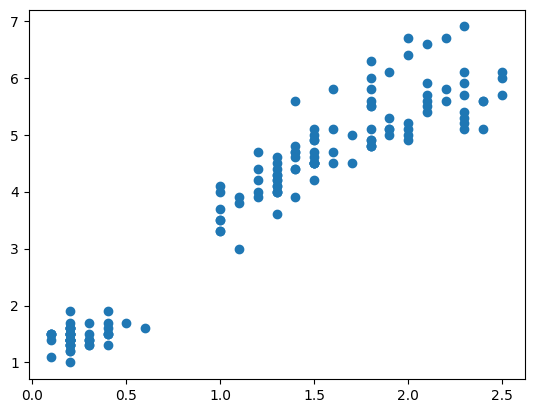

In [4]:
plt.scatter(df["PetalWidthCm"], df["PetalLengthCm"])

# We can see  that it appears to have a linear relation, but how would we get the relation? What is the algorithm?
<br>
<h4> Well, we will try to minimize the loss function.
<br>
Loss Function is a general estimation of how "wrong" our estimate is. It can be any increasing function of |y<sub>actual</sub> - y<sub>prediction</sub>|
<br>
For our convenience, we use mean of squares. 
<br>
Loss Function - $\frac{\sum_{i = 1}^{N} (y_{i} ^ {actual} - y_{i} ^ {prediction})^2}{N}$ </h4>

<h4>We can see that y is following a linear relation with respect to x, so we are trying to find a line y = mx + c, which gives the lowest loss.</h4>

<h4>So, we are trying to find out for what m and c, the loss is minumum.
<br>
We have $L(m, c) = \frac{\sum_{i = 1}^{N} (y_{i} - m x_{i} - c)^2}{N}$</h4>

<h4>$\frac{\partial L}{\partial m} = \frac{\sum_{i = 1}^{N} -x_{i}(y_{i} - m x_{i} - c)}{N}$
<br>
$\frac{\partial L}{\partial c} = \frac{\sum_{i = 1}^{N} -(y_{i} - m x_{i} - c)}{N}$
<br>
<br>
To minimize loss, we need both of these to be equal to 0, which gives us 
<br>
$m = \frac{N(\sum xy) - (\sum x)(\sum y)}{N(\sum x^2) - (\sum x)^2}$
<br>
$c = \frac{(\sum y)(\sum x^2) - (\sum x)(\sum xy)}{N(\sum x^2) - (\sum x)^2}$</h4>

<h4>With this new found formula, we can try to see how our model looks.</h4>

In [5]:
X = np.array(df["PetalWidthCm"])
Y = np.array(df["PetalLengthCm"])
N = len(X)
m = (N*sum(X*Y) - sum(X) * sum(Y))/(N * sum(X**2) - (sum(X))**2)
c = (sum(Y) * sum(X**2) - sum(X) * sum(X*Y))/(N * sum(X**2) - (sum(X))**2)
print(m)
print(c)

2.225885306553904
1.0905721458773867


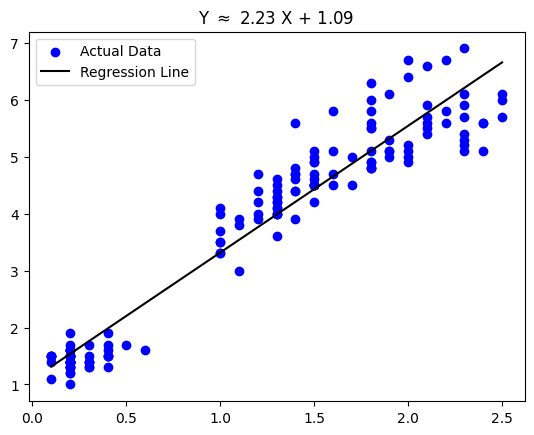

In [6]:
plt.scatter(X, Y, color = "blue")
X_1 = np.min(X)
Y_1 = m * X_1 + c
X_2 = np.max(X)
Y_2 = m * X_2 + c
plt.plot([X_1, X_2], [Y_1, Y_2], color = "black")
plt.legend(["Actual Data", "Regression Line"])
plt.title("Y " + r'$\approx$ '  + str(round(m, 2)) + " X + " + str(round(c, 2)))
plt.show()